## Importação de Bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Definindo Data Frame

In [ ]:
df = pd.read_csv('assets/Cybersecurity_Threats_2015-2024.csv')

## 1 - Informações Básicas

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [5]:
df.describe()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


In [6]:
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [7]:
print(f"Quantidade de Linhas: {df.shape[0]}")
print(f"Quantidade de Colunas: {df.shape[1]}")

Quantidade de Linhas: 3000
Quantidade de Colunas: 10


## 2 - Tratamento de Dados

### Verificação de Valores Nulos e Duplicados

In [8]:
valores_nulos = df.isnull().sum()
print(valores_nulos)

Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64


In [9]:
duplicados = df.duplicated().sum()
print(f"Quantidade de Duplicados: {duplicados}")

Quantidade de Duplicados: 0


### Verificação de consistência nas colunas

In [10]:
df['Country'].unique()

array(['China', 'India', 'UK', 'Germany', 'France', 'Australia', 'Russia',
       'Brazil', 'Japan', 'USA'], dtype=object)

In [11]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")

Country: 10 valores únicos
Year: 10 valores únicos
Attack Type: 6 valores únicos
Target Industry: 7 valores únicos
Financial Loss (in Million $): 2536 valores únicos
Number of Affected Users: 2998 valores únicos
Attack Source: 4 valores únicos
Security Vulnerability Type: 4 valores únicos
Defense Mechanism Used: 5 valores únicos
Incident Resolution Time (in Hours): 72 valores únicos


### Verificação de Outliers nas colunas numéricas

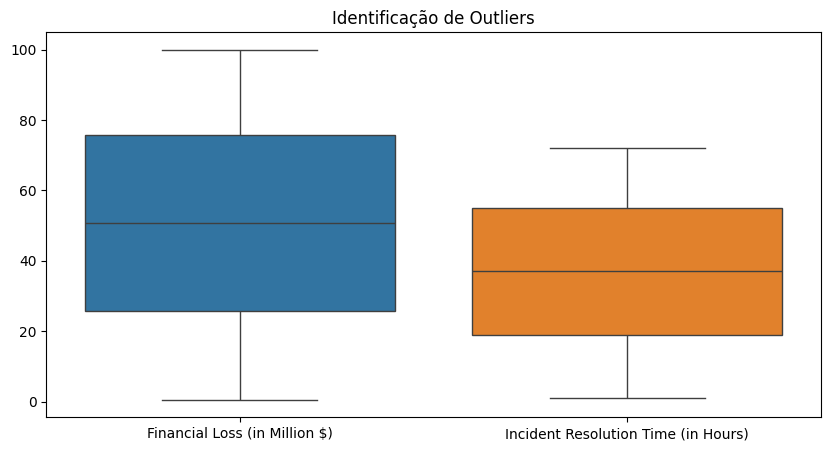

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[["Financial Loss (in Million $)", "Incident Resolution Time (in Hours)"]])
plt.title("Identificação de Outliers")
plt.show()

### Criação de uma Coluna de Severidade (Severity)

In [13]:
df.describe()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


In [ ]:
def adicionar_severidade(df):
    
    media_perda = df['Financial Loss (in Million $)'].mean()
    media_usuarios = df['Number of Affected Users'].mean()

    def classificar(row):
        perda = row['Financial Loss (in Million $)']
        usuarios = row['Number of Affected Users']

        if perda > media_perda or usuarios > media_usuarios:
            return 'HIGH'
        elif (25 <= perda < 50) or (media_usuarios / 2 < usuarios < media_usuarios):
            return 'MEDIUM'
        else:
            return 'LOW'

    df['Severity'] = df.apply(classificar, axis=1)
    return df

df = adicionar_severidade(df)

df[df['Severity'] == 'HIGH'].head()
df[df['Severity'] == 'MEDIUM'].head()
df[df['Severity'] == 'LOW'].head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours),Severity
23,Japan,2022,Phishing,Telecommunications,20.42,186148,Nation-state,Weak Passwords,Antivirus,32,LOW
31,France,2020,Malware,Telecommunications,18.38,246900,Hacker Group,Zero-day,AI-based Detection,34,LOW
34,Brazil,2023,Phishing,Healthcare,14.51,113777,Nation-state,Weak Passwords,VPN,27,LOW
75,Australia,2023,Phishing,Telecommunications,24.65,221512,Nation-state,Zero-day,AI-based Detection,56,LOW
76,France,2017,Phishing,Banking,17.88,16585,Hacker Group,Unpatched Software,Encryption,12,LOW


In [15]:
quantidade_HIGH = (df['Severity'] == 'HIGH').sum()
print(f"Total de casos com severidade HIGH: {quantidade_HIGH}")
quantidade_MEDIUM = (df['Severity'] == 'MEDIUM').sum()
print(f"Total de casos com severidade MEDIUM: {quantidade_MEDIUM}")
quantidade_LOW = (df['Severity'] == 'LOW').sum()
print(f"Total de casos com severidade LOW: {quantidade_LOW}")

Total de casos com severidade HIGH: 2246
Total de casos com severidade MEDIUM: 575
Total de casos com severidade LOW: 179


## 3 - Análise de Dados

### País com Maior Número de Casos

In [16]:
pais_mais_afetado = df['Country'].mode()
print(f"Pais mais afetado: {pais_mais_afetado}")

Pais mais afetado: 0    UK
Name: Country, dtype: object


### Quantidade de Ataques por Ano

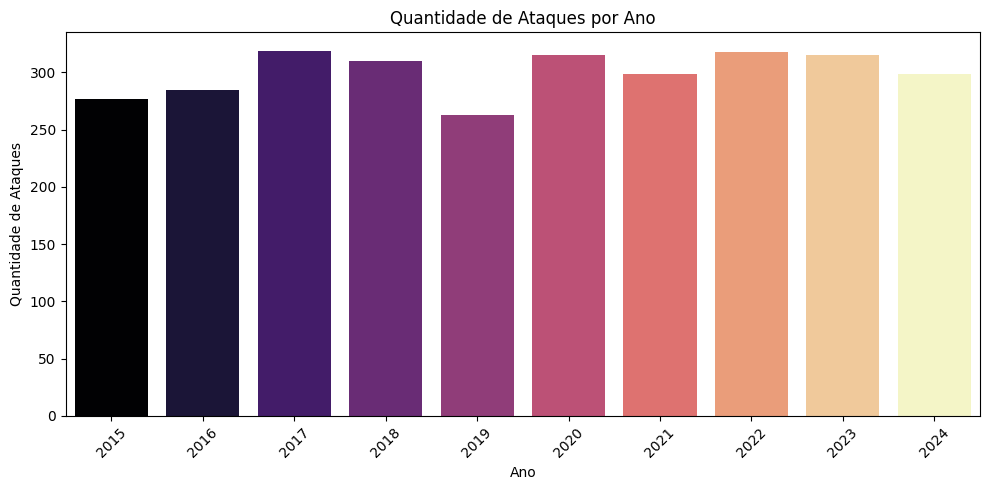

In [35]:
ataques_por_ano = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=ataques_por_ano.index, y=ataques_por_ano.values, palette='magma', hue=ataques_por_ano.index, legend=False)

plt.title('Quantidade de Ataques por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Ataques')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

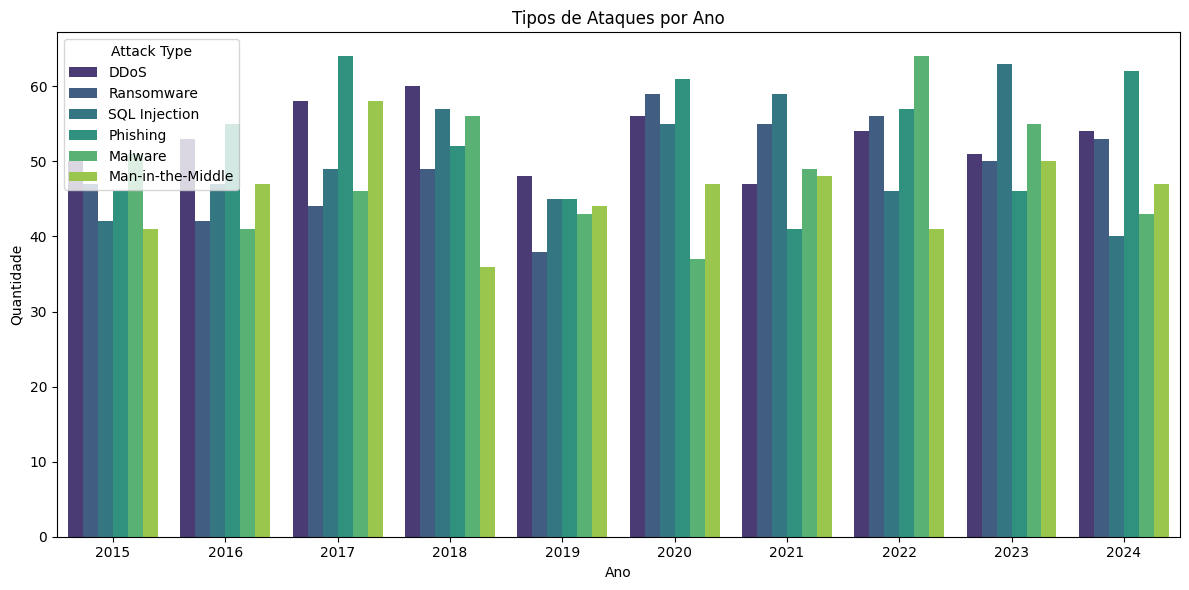

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(x='Year', data=df, hue='Attack Type', palette='viridis')

plt.title("Tipos de Ataques por Ano")
plt.xlabel("Ano")
plt.ylabel("Quantidade")
plt.tight_layout()
plt.show()

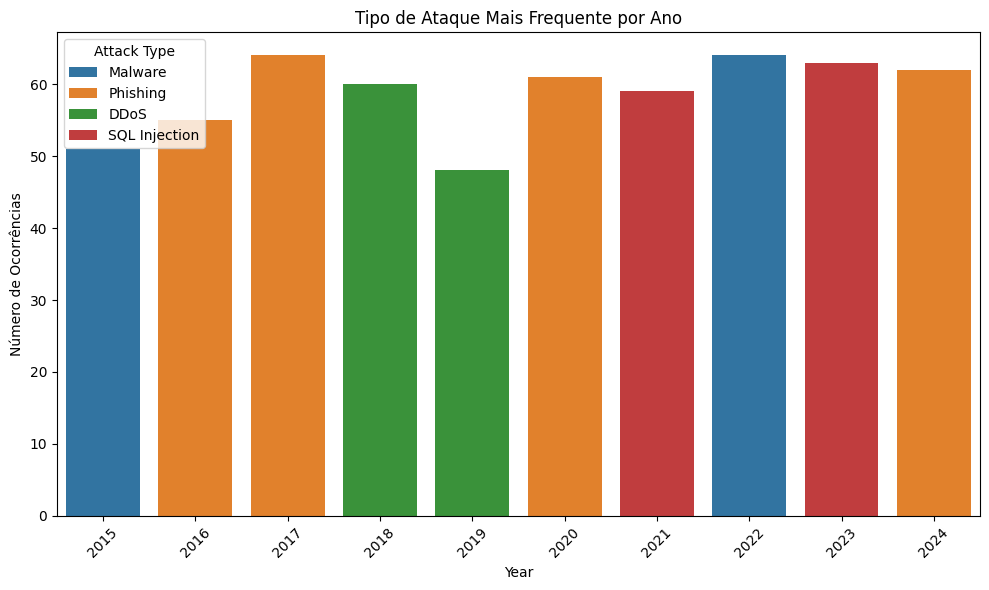

In [ ]:
contagem = df.groupby(['Year', 'Attack Type']).size().reset_index(name='Count')

mais_frequentes = contagem.loc[contagem.groupby('Year')['Count'].idxmax()]

plt.figure(figsize=(10,6))
sns.barplot(data=mais_frequentes, x='Year', y='Count', hue='Attack Type', dodge=False, palette='tab10')
plt.title('Tipo de Ataque Mais Frequente por Ano')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

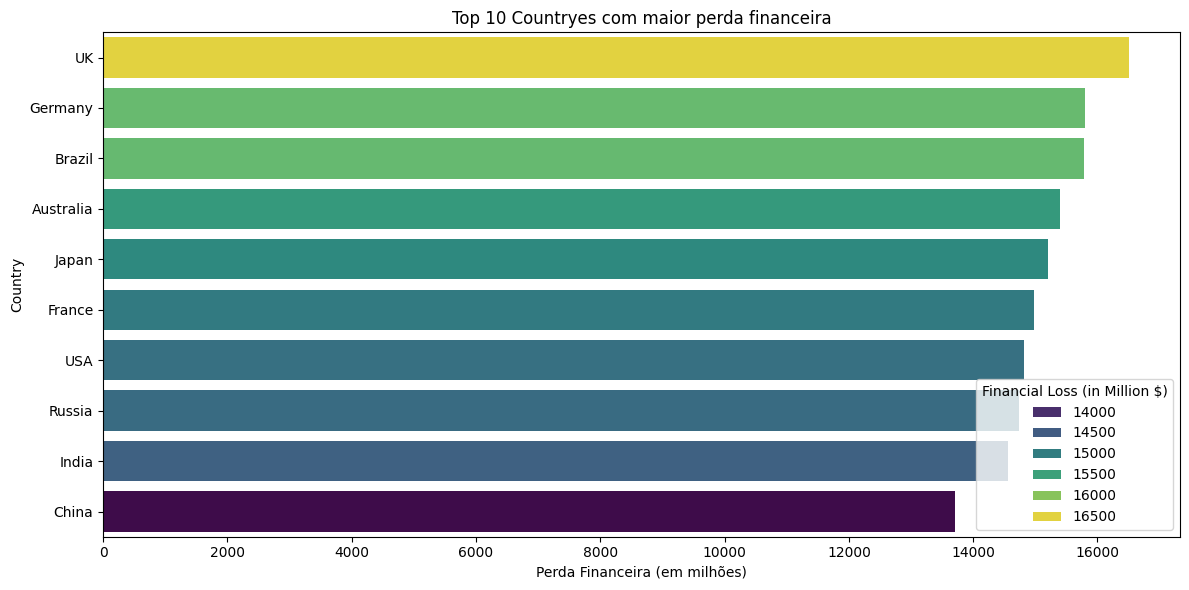

In [52]:
top_paises = df.groupby('Country')['Financial Loss (in Million $)'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=top_paises, x='Financial Loss (in Million $)', y='Country', palette='viridis', hue='Financial Loss (in Million $)')
plt.title('Top 10 Countryes com maior perda financeira')
plt.xlabel('Perda Financeira (em milhões)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

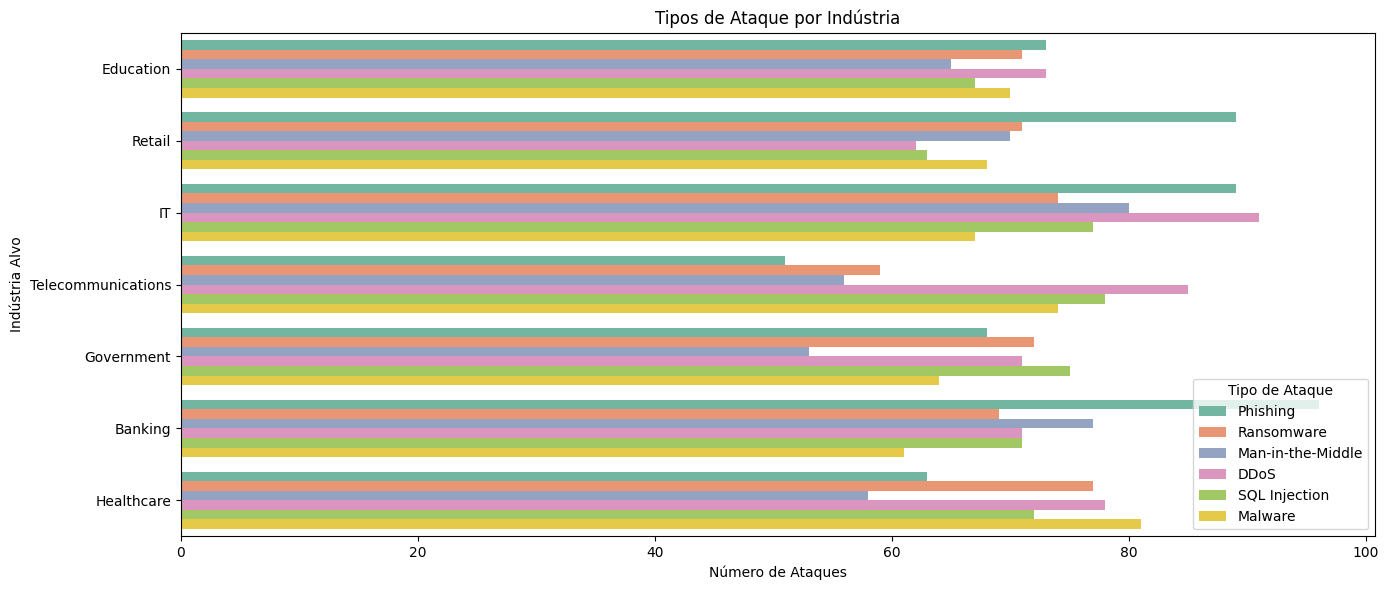

In [53]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, y='Target Industry', hue='Attack Type', palette='Set2')
plt.title('Tipos de Ataque por Indústria')
plt.xlabel('Número de Ataques')
plt.ylabel('Indústria Alvo')
plt.legend(title='Tipo de Ataque')
plt.tight_layout()
plt.show()

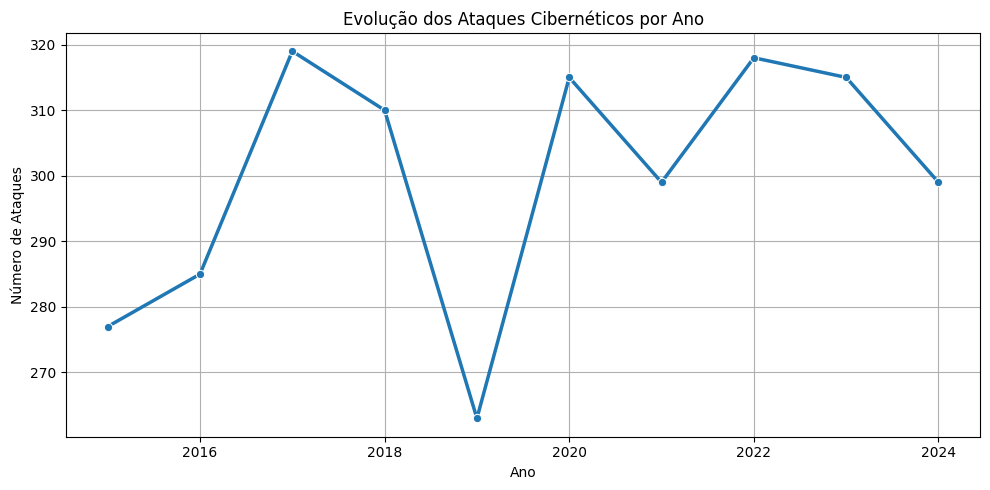

In [63]:
ataques_por_ano = df.groupby(df['Year']).size().reset_index(name='n_ataques')

plt.figure(figsize=(10,5))
sns.lineplot(data=ataques_por_ano, x='Year', y='n_ataques', marker='o', linewidth=2.5)
plt.title('Evolução dos Ataques Cibernéticos por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Ataques')
plt.grid(True)
plt.tight_layout()
plt.show()

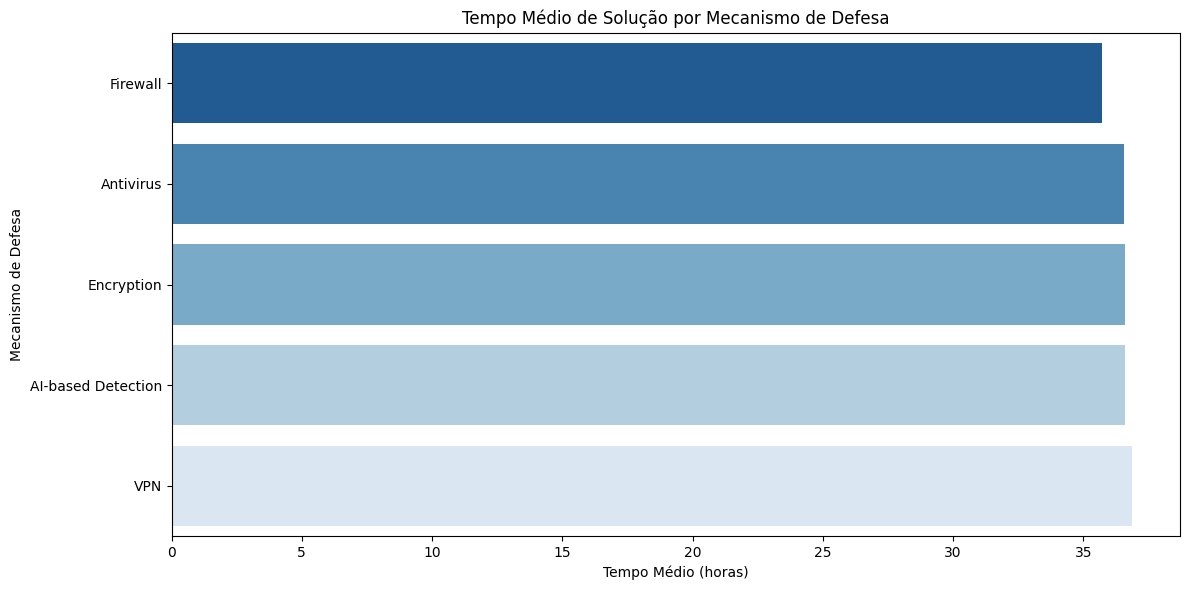

In [71]:
defesa_tempo = df.groupby('Defense Mechanism Used')['Incident Resolution Time (in Hours)'].mean().sort_values().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=defesa_tempo, x='Incident Resolution Time (in Hours)', y='Defense Mechanism Used', palette='Blues_r', hue='Defense Mechanism Used')
plt.title('Tempo Médio de Solução por Mecanismo de Defesa')
plt.xlabel('Tempo Médio (horas)')
plt.ylabel('Mecanismo de Defesa')
plt.tight_layout()
plt.show()